In [62]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
df = pd.read_csv(r"D:\InternShip\dataset_phishing.csv")


In [54]:
#status or overview of the dataset 
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes.value_counts())
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (11430, 89)

Columns: ['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'rat

In [55]:
#general info and missing values also find target variable

print("--- Info ---")
df.info()

print("\n--- Head ---")
print(df.head())

print("\n--- Summary Statistics ---")
print(df.describe())


print("\n--- Missing Values ---")
print(df.isnull().sum())

target_col = None
potential_targets = ['status', 'label', 'phishing', 'result']
for col in df.columns:
    if col.lower() in potential_targets:
        target_col = col
        break

if target_col:
    print(f"\n--- Target Variable Distribution ({target_col}) ---")
    print(df[target_col].value_counts())
    print(df[target_col].value_counts(normalize=True))
else:
    print("\nTarget column not immediately identified. Looking at column names...")
    print(df.columns.tolist())

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent        


--- Target Variable Distribution ---
status
legitimate    5715
phishing      5715
Name: count, dtype: int64

--- Outlier Check (Summary Statistics) ---
         length_url       nb_dots      nb_slash
count  11430.000000  11430.000000  11430.000000
mean      61.126684      2.480752      4.289589
std       55.297318      1.369686      1.882251
min       12.000000      1.000000      2.000000
25%       33.000000      2.000000      3.000000
50%       47.000000      2.000000      4.000000
75%       71.000000      3.000000      5.000000
max     1641.000000     24.000000     33.000000


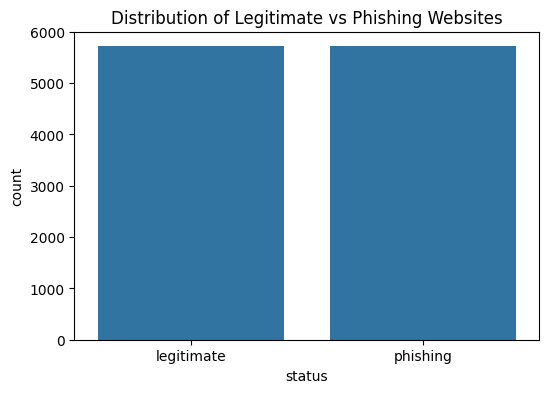

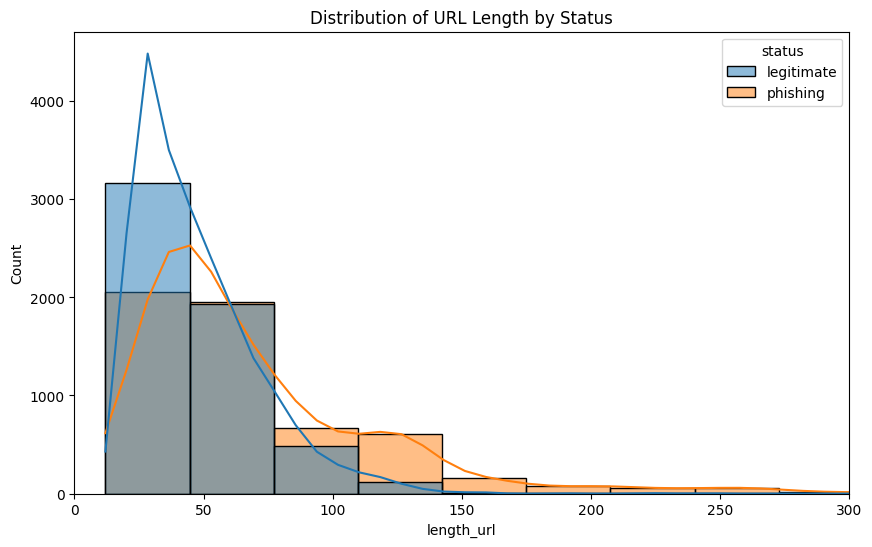

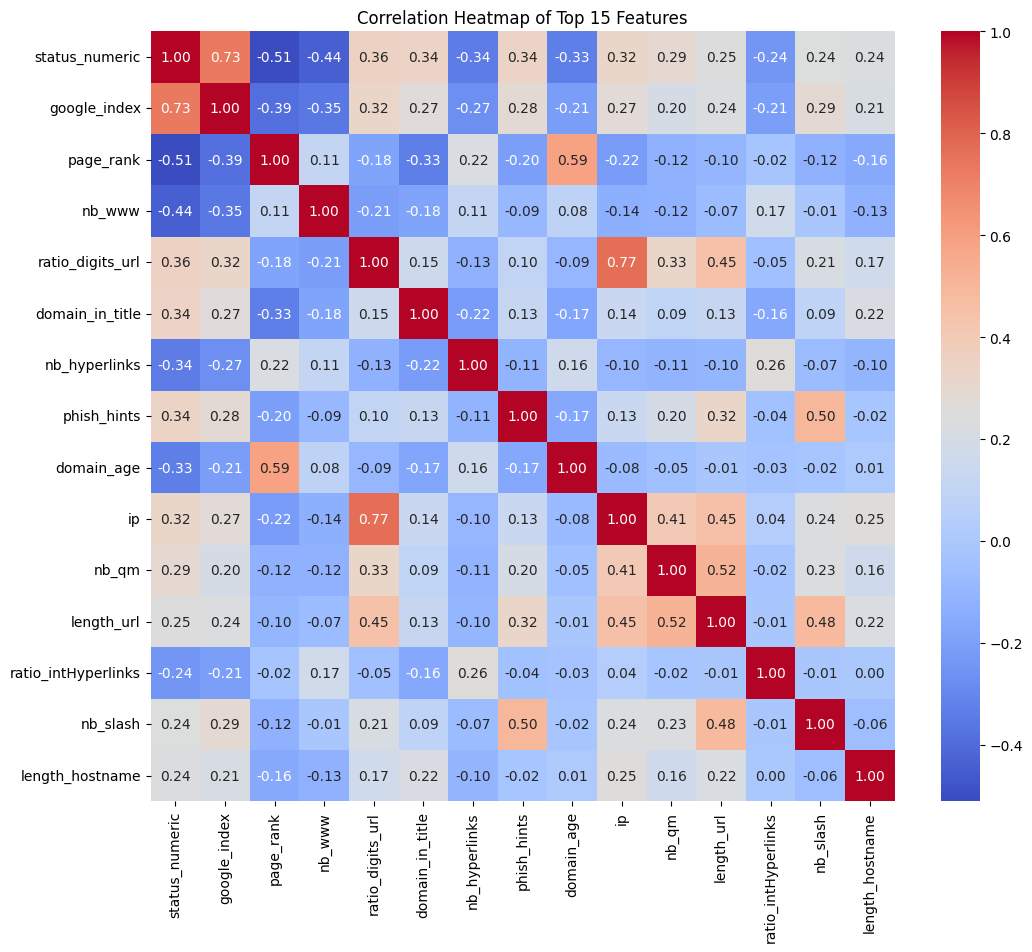

In [56]:
#dataset visulization and Distribution
target_counts = df['status'].value_counts()
print("\n--- Target Variable Distribution ---")
print(target_counts)

# Visualizing target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=df)
plt.title('Distribution of Legitimate vs Phishing Websites')
plt.savefig('target_distribution.png')

# Visualization: URL Length distribution by status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='length_url', hue='status', kde=True, bins=50)
plt.title('Distribution of URL Length by Status')
plt.xlim(0, 300) # Limiting to show main distribution
plt.savefig('url_length_dist.png')

# Correlation heatmap (selecting top features for readability)
# Let's take columns with the highest correlation to a numerical version of status
df['status_numeric'] = df['status'].apply(lambda x: 1 if x == 'phishing' else 0)
corr_matrix = df.corr(numeric_only=True)
top_corr_features = corr_matrix['status_numeric'].abs().sort_values(ascending=False).head(15).index

plt.figure(figsize=(12, 10))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top 15 Features')
plt.savefig('correlation_heatmap.png')

# Identify potential outliers in a few features
outliers_check = df[['length_url', 'nb_dots', 'nb_slash']].describe()
print("\n--- Outlier Check (Summary Statistics) ---")
print(outliers_check)

In [57]:
#for outliers
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

outlier_summary = {}

for col in numeric_cols.columns:
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = ((numeric_cols[col] < lower) | (numeric_cols[col] > upper)).sum()
    outlier_summary[col] = outliers

# Convert to DataFrame
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count'])
outlier_df.sort_values(by='Outlier_Count', ascending=False).head(10)

,Outlier_Count
domain_in_title,2562
prefix_suffix,2314
ratio_extErrors,2149
web_traffic,2138
phish_hints,2041
ratio_extMedia,2012
ip,1721
nb_underscore,1695
nb_eq,1564
nb_qm,1555


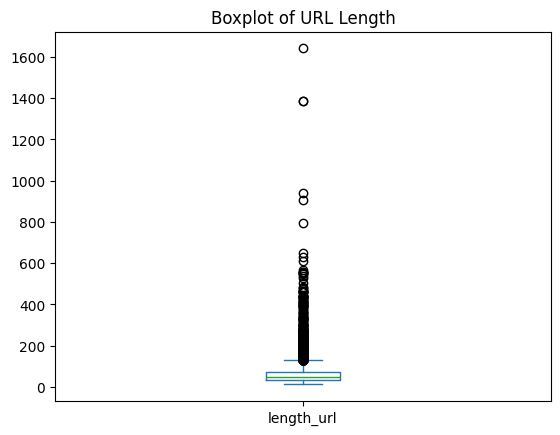

In [58]:
plt.figure()
numeric_cols['length_url'].plot(kind='box')
plt.title("Boxplot of URL Length")
plt.show()


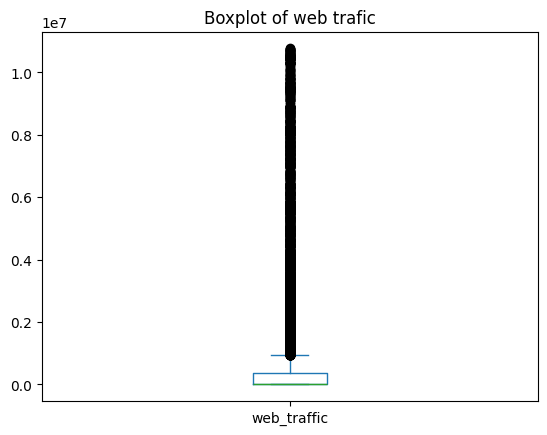

In [59]:
plt.figure()
numeric_cols['web_traffic'].plot(kind='box')
plt.title("Boxplot of web trafic")
plt.show()


In [64]:
#Analyze The duplicate 
df = pd.read_csv(r"D:\InternShip\dataset_phishing.csv")
df[df.duplicated(subset=["url"], keep=False)]


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
6035,http://e710z0ear.du.r.appspot.com/c:/users/use...,62,26,0,4,0,0,0,0,0,...,1,1,0,217,5627,0,0,1,5,phishing
11305,http://e710z0ear.du.r.appspot.com/c:/users/use...,54,26,0,4,0,0,0,0,0,...,1,1,0,230,5614,0,0,1,5,phishing


In [61]:
df.select_dtypes(include='object').mode()


,url,status
0,http://e710z0ear.du.r.appspot.com/c:/users/use...,legitimate
1,NaN,phishing
